In [1]:
import glob
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import bottleneck as bn
from scipy import signal

# Loading the data

In [2]:
#Sea-level curves
geo_wave_100=np.arange(-3*np.pi, -1*np.pi, (((3*np.pi)-(1*np.pi))/1e2))
rounding=2

A25m=25/2 #This means amplitude is -12.5 and +12.5
A50m=50/2 #This means amplitude is -25 and +25
A100m=100/2#This means amplitude is -50 and +50
f_0_1Ma=-10e6/.1e6 #20 full cycles, each of 0.5 Ma I made negative so that SL is low and delta progrades easily
f_0_5Ma=-10e6/.5e6 #20 full cycles, each of 0.5 Ma I made negative so that SL is low and delta progrades easily
f_5Ma=-10e6/5e6 

# Results from simulations with synthetic frequency
Delta_070518_notect_wall_SL_A25mf5Ma_Te50=pd.read_csv('./Delta_070518_notect_wall_SL_A25mf5Ma_Te50.csv', sep=' ',header=None)
Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50=pd.read_csv ('./Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50.csv',sep=' ', header=None)
Delta_070518_notect_wall_SL0_Te50=pd.read_csv ('./Delta_070518_notect_wall_SL0_Te50.csv',sep=',', header=None)

# Moving average

In [3]:
window=10
nfile=len(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[3])
ts=np.arange(0,nfile-1,1)
realtime=(ts*10e6)/100

A25mf5Ma_Te50_mm_flex=bn.move_mean(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[4][0:-1]/1e3,window=window, min_count=1)
A25mf5Ma_Te50_mm_flex=np.append (A25mf5Ma_Te50_mm_flex,Delta_070518_notect_wall_SL_A25mf5Ma_Te50[4][nfile-1]/1e3)
realtime_mm=np.append(bn.move_mean(realtime/1e6,window=window, min_count=1),np.array(12))
A25mf5Ma_Te50_mm_rm=bn.move_mean(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[0][0:-1]/1e3,window=window, min_count=1)
A25mf5Ma_Te50_mm_rm=np.append (A25mf5Ma_Te50_mm_rm,Delta_070518_notect_wall_SL_A25mf5Ma_Te50[0][nfile-1]/1e3)


# Power spectra

In [4]:
nperseg=99
#Power spectra - Sea level
freqA25mf0_1Ma_1e2, psdA25mf0_1Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_1Ma),rounding)*A50m, nperseg = nperseg)
freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_5Ma),rounding)*A50m, nperseg = nperseg)
freqA25mf5Ma_1e2, psdA25mf5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A50m, nperseg = nperseg)

# freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_5Ma),rounding)*A50m)
# freqA25mf5Ma_1e2, psdA25mf5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A50m)


# Power spectra and detrending - Flexure
freqs_A25mf0_5Ma_Te50_dt, psd_A25mf0_5Ma_Te50_dt = signal.welch(signal.detrend(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[4][20:-1]), nperseg = nperseg)
freqs_A25mf5Ma_Te50_dt, psd_A25mf5Ma_Te50_dt = signal.welch(signal.detrend(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[4][20:-1]), nperseg = nperseg)
freqs_SL0_Te50_dt, psd_SL0_Te50_dt=signal.welch(signal.detrend(Delta_070518_notect_wall_SL0_Te50[4][20:-1]), nperseg = nperseg)

# Power spectra and detrending - River mouth distance
freqs_A25mf0_5Ma_Te50_rmd_dt, psd_A25mf0_5Ma_Te50_rmd_dt = signal.welch(signal.detrend(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[0][20:-1]), nperseg = nperseg)
freqs_A25mf5Ma_Te50_rmd_dt, psd_A25mf5Ma_Te50_rmd_dt = signal.welch(signal.detrend(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[0][20:-1]), nperseg = nperseg)
freqs_SL0_Te50_rmd_dt, psd_SL0_Te50_rmd_dt=signal.welch(signal.detrend(Delta_070518_notect_wall_SL0_Te50[0][20:-1]), nperseg = nperseg)


/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:2535: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



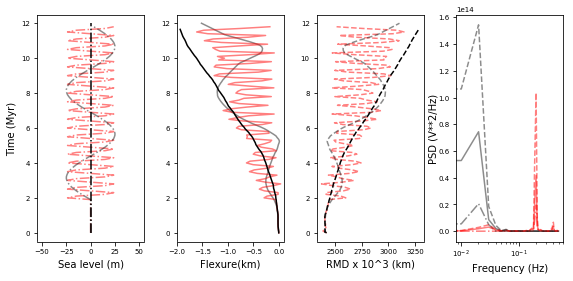

In [86]:
#Putting everything together
fig= plt.subplots( figsize=(7.8,7.48/2))# This size is in inches
####

red=(1,0,0,0.5)
grey=(0.1,0.1,0.1,0.5)

#Sea-level 
plt.subplot(1,4,1)
plt.ylim([-0.5,12.5])
plt.xlim([-55,55])

plt.plot(np.append(np.zeros(19),np.round(np.sin(geo_wave_100*f_0_5Ma),rounding)*A50m),realtime/1e6,'-.',label="A=25m, f=0.5Ma,np=1e2",c=red)
plt.plot(np.append(np.zeros(19),np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A50m), realtime/1e6,'-.',label="A=25m, f=5Ma,np=1e2",c=grey)
plt.plot( np.zeros(13),np.arange(0,13,1),'-.', c='k') #Line at 0 elevation, thickness
plt.xlabel('Sea level (m)')
plt.ylabel('Time (Myr)')
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7)  
plt.tick_params(axis='both', which='major', labelsize=7)

#Flexure 
plt.subplot(1,4,2)
plt.ylim([-0.5,12.5])
plt.xlim([-2,0.1])
ts1=np.arange(1,len(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[1])-1,1)
realtime1 =(ts1*10e6)/100
ts2=np.arange(1,len(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[1])-1,1)
realtime2=(ts2*10e6)/100
window=10
plt.plot(A25mf5Ma_Te50_mm_flex,realtime_mm, c=grey)
plt.plot(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[4][0:-1]/1e3,realtime/1e6, c=red )
plt.plot(bn.move_mean(Delta_070518_notect_wall_SL0_Te50[4][0:-1]/1e3,window=4, min_count=1),
         bn.move_mean(realtime/1e6,window=4, min_count=1),  c='k')
plt.xlabel('Flexure(km)')
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7) 
plt.tick_params(axis='both', which='major', labelsize=7)

#River mouth distance
plt.subplot(1,4,3)
plt.ylim([-0.5,12.5])
plt.plot(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[0][0:-1]/1e3,realtime/1e6,'--', c=red)
plt.plot(bn.move_mean(Delta_070518_notect_wall_SL0_Te50[0][0:-1]/1e3,window=4, min_count=1),
         bn.move_mean(realtime/1e6,window=4, min_count=1), '--', c='k')
plt.plot(A25mf5Ma_Te50_mm_rm,realtime_mm,'--', c=grey)
plt.xlabel('RMD x 10^3 (km)')
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7)  
plt.tick_params(axis='both', which='major', labelsize=7)

####
plt.subplot(1,4,4)
#Sea level
plt.semilogx(freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2*1e9,'-.', label="A=25m, f=0.5Ma,np=1e2", c=red)
plt.semilogx(freqA25mf5Ma_1e2, psdA25mf5Ma_1e2*1e9, '-.', label="A=25m, f=5Ma,np=1e2", c=grey)
#Flexure
plt.semilogx(freqs_A25mf0_5Ma_Te50_dt, psd_A25mf0_5Ma_Te50_dt*1e7, c=red)
plt.semilogx(freqs_A25mf5Ma_Te50_dt, psd_A25mf5Ma_Te50_dt*1e7, c=grey)
#Distance to river mouth
plt.semilogx(freqs_A25mf0_5Ma_Te50_rmd_dt, psd_A25mf0_5Ma_Te50_rmd_dt*1e2, '--', c=red, label='A=25m, f=0.5Ma')
plt.semilogx(freqs_A25mf5Ma_Te50_rmd_dt, psd_A25mf5Ma_Te50_rmd_dt*1e2,'--',c=grey, label='A=25m, f=5Ma')
#plt.axvline(0.02, color=grey)

plt.tick_params(axis='both', which='major', labelsize=7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)',labelpad=0.10)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(pad=0.10)

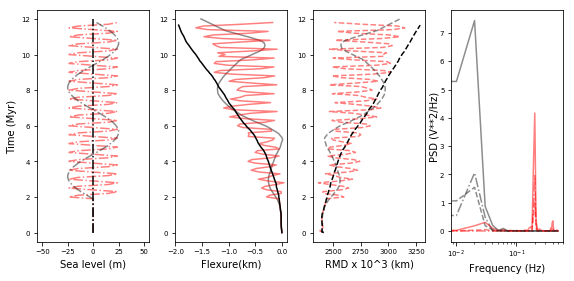

In [123]:
#Putting everything together
fig= plt.subplots( figsize=(7.8,7.48/2))# This size is in inches
####

red=(1,0,0,0.5)
grey=(0.1,0.1,0.1,0.5)

#Sea-level 
plt.subplot(1,4,1)
plt.ylim([-0.5,12.5])
plt.xlim([-55,55])

plt.plot(np.append(np.zeros(19),np.round(np.sin(geo_wave_100*f_0_5Ma),rounding)*A50m),realtime/1e6,'-.',label="A=25m, f=0.5Ma,np=1e2",c=red)
plt.plot(np.append(np.zeros(19),np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A50m), realtime/1e6,'-.',label="A=25m, f=5Ma,np=1e2",c=grey)
plt.plot( np.zeros(13),np.arange(0,13,1),'-.', c='k') #Line at 0 elevation, thickness
plt.xlabel('Sea level (m)')
plt.ylabel('Time (Myr)')
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7)  
plt.tick_params(axis='both', which='major', labelsize=7)

#Flexure 
plt.subplot(1,4,2)
plt.ylim([-0.5,12.5])
plt.xlim([-2,0.1])
ts1=np.arange(1,len(Delta_070518_notect_wall_SL_A25mf5Ma_Te50[1])-1,1)
realtime1 =(ts1*10e6)/100
ts2=np.arange(1,len(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[1])-1,1)
realtime2=(ts2*10e6)/100
window=10
plt.plot(A25mf5Ma_Te50_mm_flex,realtime_mm, c=grey)
plt.plot(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[4][0:-1]/1e3,realtime/1e6, c=red )
plt.plot(bn.move_mean(Delta_070518_notect_wall_SL0_Te50[4][0:-1]/1e3,window=4, min_count=1),
         bn.move_mean(realtime/1e6,window=4, min_count=1),  c='k')
plt.xlabel('Flexure(km)')
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7) 
plt.tick_params(axis='both', which='major', labelsize=7)

#River mouth distance
plt.subplot(1,4,3)
plt.ylim([-0.5,12.5])
plt.plot(Delta_070518_notect_wall_SL_A25mf0_5Ma_Te50[0][0:-1]/1e3,realtime/1e6,'--', c=red)
plt.plot(bn.move_mean(Delta_070518_notect_wall_SL0_Te50[0][0:-1]/1e3,window=4, min_count=1),
         bn.move_mean(realtime/1e6,window=4, min_count=1), '--', c='k')
plt.plot(A25mf5Ma_Te50_mm_rm,realtime_mm,'--', c=grey)
plt.xlabel('RMD x 10^3 (km)')
plt.rc('xtick', labelsize=7)    
plt.rc('ytick', labelsize=7)  
plt.tick_params(axis='both', which='major', labelsize=7)

####
plt.subplot(1,4,4)
# SLf=1e-1
# Ff=1e-3
# DRMf=1e-9
SLf=1e-4
Ff=1e-6
DRMf=1e-12
#Sea level
plt.semilogx(freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2*SLf,'-.', label="A=25m, f=0.5Ma,np=1e2", c=red)
plt.semilogx(freqA25mf5Ma_1e2, psdA25mf5Ma_1e2*SLf, '-.', label="A=25m, f=5Ma,np=1e2", c=grey)
#Flexure
plt.semilogx(freqs_A25mf0_5Ma_Te50_dt, psd_A25mf0_5Ma_Te50_dt*Ff, c=red)
plt.semilogx(freqs_A25mf5Ma_Te50_dt, psd_A25mf5Ma_Te50_dt*Ff, c=grey)
#Distance to river mouth
plt.semilogx(freqs_A25mf0_5Ma_Te50_rmd_dt, psd_A25mf0_5Ma_Te50_rmd_dt*DRMf, '--', c=red, label='A=25m, f=0.5Ma')
plt.semilogx(freqs_A25mf5Ma_Te50_rmd_dt, psd_A25mf5Ma_Te50_rmd_dt*DRMf,'--',c=grey, label='A=25m, f=5Ma')
#plt.axvline(0.02, color=grey)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)',labelpad=0.10)
#plt.legend(bbox_to_anchor=(-2, -1), loc='lower center', borderaxespad=0.)
plt.tight_layout(pad=0.10)